<a href="https://colab.research.google.com/github/ajmal92/datascience/blob/main/Delhivery_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

#### About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

#### How can you help here?

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = pd.read_csv("/Users/ajmal.m/Downloads/delhivery_data.txt")

In [ ]:
df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714


In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

- Source name has 293 null rows and destination_name as 261 null entries

In [ ]:
df.shape

(144867, 24)

There are 144867 rows and 24 columns in the data

In [ ]:
df = df.dropna()

In [ ]:
for col in ['trip_creation_time', 'od_start_time', 'od_end_time']:
    df[col] = pd.to_datetime(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

### Feature Engineering - place and state

In [ ]:
def get_city(x):
    return str(x).split('(')[0].strip().split("_")[0]

def get_state(x):
    return str(x).split('(')[1][:-1]

def get_place(x):
    x = str(x).split("(")[0].strip()
    if len(x.split("_"))==3:
        return x.split("_")[-1]
    else:
        'None'

In [ ]:
df['source_state'] = df['source_name'].apply(lambda x: get_state(x))
df['destination_state'] = df['destination_name'].apply(lambda x: get_state(x))
df['source_city'] = df['source_name'].apply(lambda x: get_city(x))
df['destination_city'] = df['destination_name'].apply(lambda x: get_city(x))
df['source_place'] = df['source_name'].apply(lambda x: get_place(x))
df['destination_place'] = df['destination_name'].apply(lambda x: get_place(x))

In [ ]:
segment_cols = [col for col in df.columns if 'segment' in col]

In [ ]:
segment_group_by = ['trip_uuid', 'source_center', 'destination_center']

In [ ]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_state,destination_state,source_city,destination_city,source_place,destination_place
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,1.272727,Gujarat,Gujarat,Anand_VUNagar_DC,Khambhat_MotvdDPP_D,DC,D
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,10.0,9.0,9.7590,1.111111,Gujarat,Gujarat,Anand_VUNagar_DC,Khambhat_MotvdDPP_D,DC,D
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,16.0,7.0,10.8152,2.285714,Gujarat,Gujarat,Anand_VUNagar_DC,Khambhat_MotvdDPP_D,DC,D
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.0,12.0,13.0224,1.750000,Gujarat,Gujarat,Anand_VUNagar_DC,Khambhat_MotvdDPP_D,DC,D
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,6.0,5.0,3.9153,1.200000,Gujarat,Gujarat,Anand_VUNagar_DC,Khambhat_MotvdDPP_D,DC,D


### Feature Engineering - Create cumulative sums

In [ ]:
for col in segment_cols:
    df[col+"_sum"] = df.groupby(by=segment_group_by)[col].cumsum()

In [ ]:
segment_cols

['segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor',
 'segment_actual_time_sum']

Creating segment wise grouping

In [ ]:
create_segment_dict = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'source_state' : 'first',
    'destination_state' : 'last',
    
    'source_city' : 'first',
    'destination_city' : 'last',
    
    'source_place' : 'first',
    'destination_place' : 'last',
    
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'max',
    'segment_actual_time_sum': 'max',
    'segment_osrm_time_sum': 'max',
    'segment_osrm_distance_sum': 'max',
    
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    'start_scan_to_end_scan': 'max'
    
}

In [ ]:
segment = df.groupby(by=segment_group_by).agg(create_segment_dict).reset_index()

## Feature: od_time_diff_hour

In [ ]:
segment['od_time_diff_hour'] = np.round((segment['od_end_time'] - segment['od_start_time']).dt.seconds/60,0)

In [ ]:
segment['start_scan_to_end_scan'].mean(), segment['od_time_diff_hour'].mean()

(298.5533902829685, 245.11726794294867)

In [ ]:
segment.drop(['od_end_time', 'od_start_time'], axis=1, inplace=True)

#### Hypothesis Testing: `start_scan_to_end_scan` vs `od_time_diff_hour` - t-test-2-samples

- H0 ( Null Hypothesis ) is that mean of `start_scan_to_end_scan` and mean of `od_time_diff_hour` are equal
- HA ( Alternate Hypothesis) is that means are different

In [ ]:
p=stats.ttest_ind(segment['od_time_diff_hour'],segment['start_scan_to_end_scan'])[1]
if p<0.05:
    print('Null Hypothesis can be rejected.There is significant different between start_scan_to_end_scan and time_diff_hour')
else:
    print('Null Hypothesis cannot be rejected')

Null Hypothesis can be rejected.There is significant different between start_scan_to_end_scan and time_diff_hour


Text(0.5, 1.0, 'time_diff_hour')

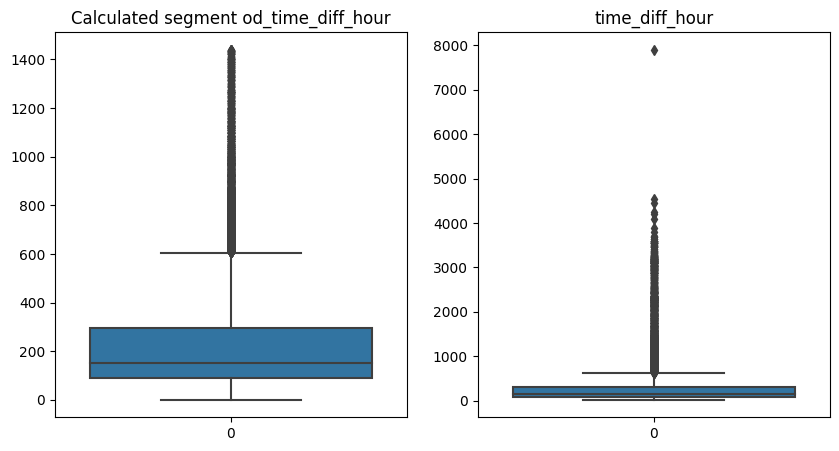

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.boxplot(segment['od_time_diff_hour'])
plt.title('Calculated segment od_time_diff_hour')
plt.subplot(1, 2, 2)
sns.boxplot(segment['start_scan_to_end_scan'])
plt.title('time_diff_hour')



In [ ]:
segment.head(3)

,trip_uuid,source_center,destination_center,data,trip_creation_time,route_schedule_uuid,route_type,source_state,destination_state,source_city,...,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,osrm_time,osrm_distance,od_time_diff_hour
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Uttar Pradesh,Haryana,Kanpur_Central_H_6,...,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,728.0,534.0,670.6205,329.0,446.5496,1261.0
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Madhya Pradesh,Uttar Pradesh,Bhopal_Trnsport_H,...,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,820.0,474.0,649.8528,388.0,544.8027,1000.0
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Karnataka,Karnataka,Doddablpur_ChikaDPP_D,...,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,46.0,26.0,28.1995,26.0,28.1994,59.0


In [ ]:
cols = [col for col in df.columns if 'time' in col or 'osrm' in col or 'segment' in col]

In [ ]:
create_trip_dict = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'source_state' : 'first',
    
    'destination_state' : 'last',
    
    'source_city' : 'first',
    
    'destination_city' : 'last',
    
    'source_place' : 'first',
    
    'destination_place' : 'last',

    'start_scan_to_end_scan' : 'sum',
    
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'segment_actual_time_sum': 'sum',
    'segment_osrm_time_sum': 'sum',
    'segment_osrm_distance_sum': 'sum',
    
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    
}

In [ ]:
trip = segment.groupby(by=['trip_uuid']).agg(create_trip_dict).reset_index()

In [ ]:
trip.head(4)

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_state,destination_state,source_city,destination_city,source_place,destination_place,start_scan_to_end_scan,actual_distance_to_destination,actual_time,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,osrm_time,osrm_distance
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Uttar Pradesh,Uttar Pradesh,Kanpur,Kanpur,H,HB,2259.0,824.732854,1562.0,1548.0,1008.0,1320.4733,717.0,991.3523
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Karnataka,Karnataka,Doddablpur,Doddablpur,D,D,180.0,73.186911,143.0,141.0,65.0,84.1894,68.0,85.1110
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Haryana,Haryana,Gurgaon,Gurgaon,HB,HB,3933.0,1927.404273,3347.0,3308.0,1941.0,2545.2678,1740.0,2354.0665
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,Maharashtra,Maharashtra,Mumbai Hub,Mumbai,None,IP,100.0,17.175274,59.0,59.0,16.0,19.8766,15.0,19.6800


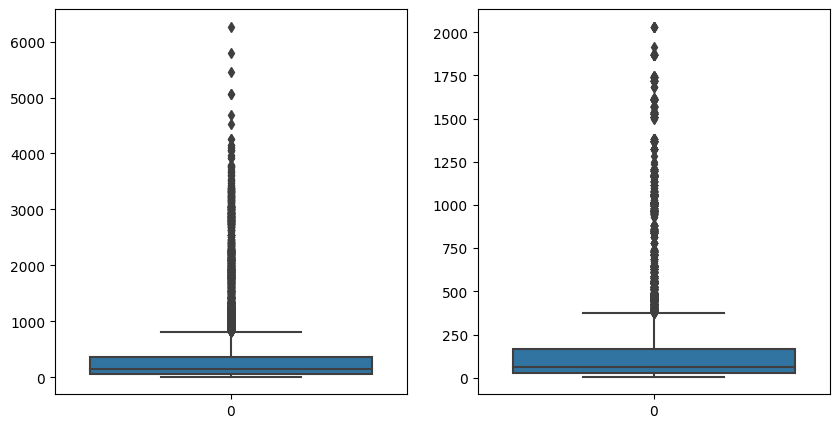

In [ ]:
plot_box_plot(data=trip, col1='actual_time', col2='osrm_time')

In [ ]:
def plot_box_plot(data, col1, col2):
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    sns.boxplot(data[col1])
#     plt.title('Calculated segment od_time_diff_hour')
    plt.subplot(1, 2, 2)
    sns.boxplot(data[col2])
#     plt.title('time_diff_hour')


 #### Hypothesis Testing: `actual_time` vs `osrm_time` - t-test 2 samples

- H0 ( Null Hypothesis ) is that mean of `actual_time` and mean of `osrm_time` are equal
- HA ( Alternate Hypothesis ) is that means are different

In [ ]:
stats.ttest_ind(trip['actual_time'], trip['osrm_time'])

Ttest_indResult(statistic=38.08071567723596, pvalue=8.2146191343466e-310)

There is a significant different in the `osrm_time` and `actual_time` or a trip

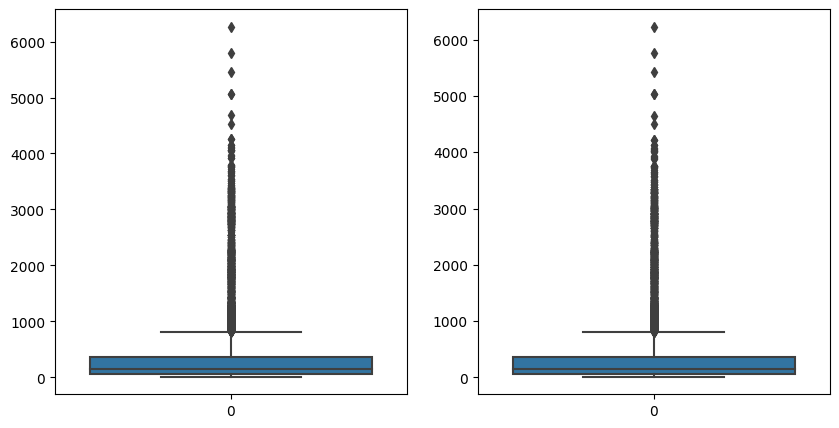

In [ ]:
plot_box_plot(data=trip, col1='actual_time', col2='segment_actual_time_sum')

 #### Hypothesis Testing: `actual_time` vs `segment_actual_time_sum` - t-test 2 samples

- H0 ( Null Hypothesis ) is that mean of `actual_time` and `segment_actual_time_sum` are same
- HA (Alternate Hypothesis) is that the means are different

In [ ]:
stats.ttest_ind(trip['actual_time'], trip['segment_actual_time_sum'])

Ttest_indResult(statistic=0.4994549431541971, pvalue=0.6174626367102172)

Since p-value is large, null hypothesis cannot be rejected. Hence, there is no significant different between `actual_time` and `segment_actual_time_sum`

In [ ]:
trip['segment_actual_time_sum'].mean(), trip['actual_time'].mean()

(353.05930885237035, 356.30601203760057)

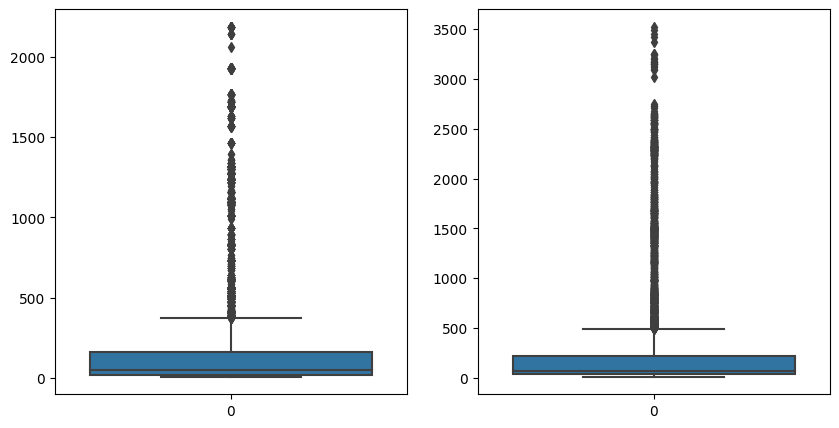

In [ ]:
plot_box_plot(data=trip, col1='actual_distance_to_destination', col2='segment_osrm_distance_sum')

In [ ]:
trip['actual_distance_to_destination'].mean(), trip['segment_osrm_distance_sum'].mean()

(164.0901961720598, 222.7054664434977)

 #### Hypothesis Testing: `actual_distance_to_destination` vs `segment_osrm_distance_sum` - t-test 2 samples

- H0 ( Null Hypothesis ) is that mean of `actual_distance_to_destination` and `segment_osrm_distance_sum` are same
- HA (Alternate Hypothesis) is that the means are different

In [ ]:
stats.ttest_ind(trip['actual_distance_to_destination'], trip['segment_osrm_distance_sum'])

Ttest_indResult(statistic=-13.791758457154543, pvalue=3.886732915808316e-43)

There is a significant difference between `actual_distance_to_destination` and `segment_osrm_distance_sum`

In [ ]:
trip['osrm_time'].mean(), trip['segment_osrm_time_sum'].mean()

(160.99093798606884, 180.5115980252925)

 #### Hypothesis Testing: `osrm_time` vs `segment_osrm_time_sum` - t-test 2 samples

- H0 ( Null Hypothesis ) is that mean of `osrm_time` and `segment_osrm_time_sum` are same
- HA (Alternate Hypothesis) is that the means are different

In [ ]:
stats.ttest_ind(trip['osrm_time'], trip['segment_osrm_time_sum'])

Ttest_indResult(statistic=-5.711782161676085, pvalue=1.128703468644937e-08)

There is a significant difference between `osrm_time` and `segment_osrm_time_sum`

### Handling Outliers using IQR method

In [ ]:
q1 = trip_numeric.quantile(0.25)
q3 = trip_numeric.quantile(0.75)
iqr = q3 - q1
ub = q3 + 1.5*iqr

Text(0.5, 1.0, 'Without Outliers')

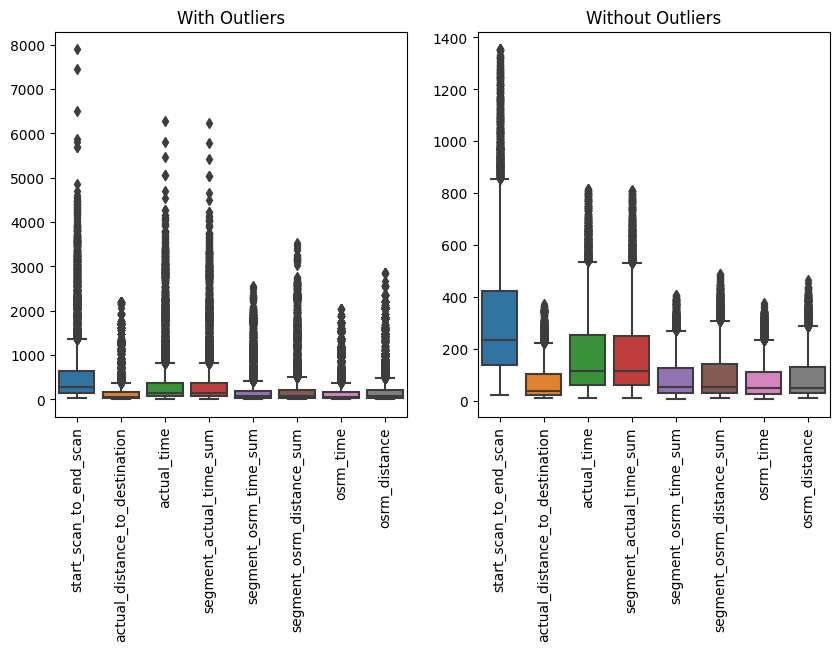

In [ ]:
plt.figure(figsize=(10,5))


plt.subplot(1, 2, 1)
sns.boxplot(trip_numeric)
plt.xticks(rotation=90)
plt.title('With Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(trip_numeric[np.all(trip_numeric<=ub, axis=1)])
plt.xticks(rotation=90)
plt.title('Without Outliers')



## Do one-hot encoding of categorical variables - Categorical to Numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()


In [ ]:
trip['route_type'].value_counts()

Carting    8906
FTL        5881
Name: route_type, dtype: int64

In [ ]:
col='route_type'
trip[col] = label_encoder.fit_transform(trip[col])

In [ ]:
trip['route_type'].value_counts()

0    8906
1    5881
Name: route_type, dtype: int64

In [ ]:
trip['data'].value_counts()

training    10645
test         4142
Name: data, dtype: int64

In [ ]:
col='data'
trip[col] = label_encoder.fit_transform(trip[col])

In [ ]:
trip['data'].value_counts()

1    10645
0     4142
Name: data, dtype: int64

### Standardization /Normalization

In [ ]:
scaler = StandardScaler()
std_data = scaler.fit_transform(trip.select_dtypes(np.number))
std_data = pd.DataFrame(std_data, columns=trip.select_dtypes(np.number).columns)
std_data.head()

,data,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,osrm_time,osrm_distance
0,0.623781,1.230597,2.627598,2.162548,2.147277,2.147833,2.629714,2.633597,2.048290,2.125107
1,0.623781,-0.812614,-0.530859,-0.297563,-0.379887,-0.381164,-0.367090,-0.332307,-0.342571,-0.320538
2,0.623781,1.230597,5.170772,5.772034,5.326268,5.311325,5.594737,5.571936,5.816936,5.802622
3,0.623781,-0.812614,-0.652397,-0.480911,-0.529486,-0.528554,-0.522809,-0.486596,-0.537818,-0.497115
4,0.623781,1.230597,0.284962,-0.119943,-0.027259,-0.023473,-0.208192,-0.182120,-0.162059,-0.154082


In [ ]:
std_data

,data,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,osrm_time,osrm_distance
0,0.623781,1.230597,2.627598,2.162548,2.147277,2.147833,2.629714,2.633597,2.048290,2.125107
1,0.623781,-0.812614,-0.530859,-0.297563,-0.379887,-0.381164,-0.367090,-0.332307,-0.342571,-0.320538
2,0.623781,1.230597,5.170772,5.772034,5.326268,5.311325,5.594737,5.571936,5.816936,5.802622
3,0.623781,-0.812614,-0.652397,-0.480911,-0.529486,-0.528554,-0.522809,-0.486596,-0.537818,-0.497115
4,0.623781,1.230597,0.284962,-0.119943,-0.027259,-0.023473,-0.208192,-0.182120,-0.162059,-0.154082
...,...,...,...,...,...,...,...,...,...,...
14782,-1.603126,-0.812614,-0.413880,-0.348054,-0.486744,-0.487213,-0.376623,-0.378690,-0.364674,-0.351972
14783,-1.603126,-0.812614,-0.713166,-0.486350,-0.597162,-0.596856,-0.538699,-0.495684,-0.548870,-0.506808
14784,-1.603126,-0.812614,-0.164728,-0.410502,-0.132335,-0.129522,-0.293997,-0.282653,-0.416249,-0.391263
14785,-1.603126,-0.812614,-0.277150,-0.096128,-0.164392,-0.170863,0.128670,0.001984,0.066344,-0.088455


<Axes: >

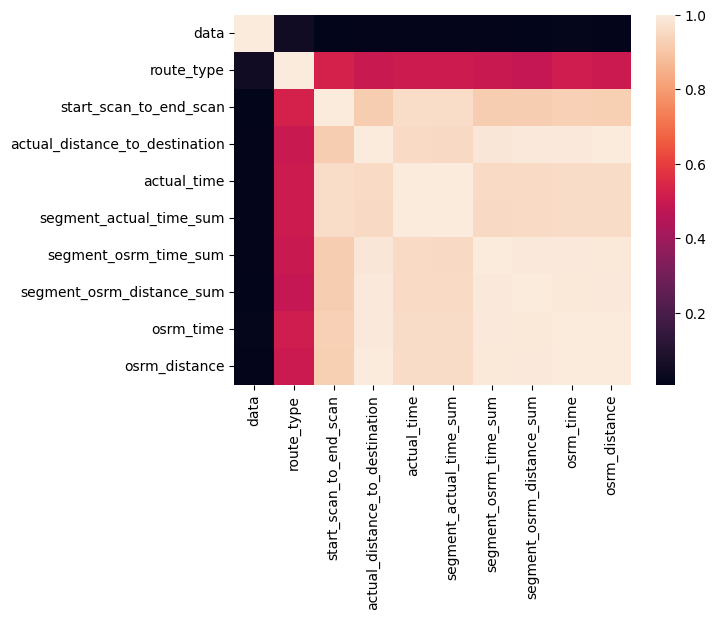

In [ ]:
sns.heatmap(std_data.corr())

- There is a strong correlation between `start_scan_to_end_scan` with `orsm_distance`. `orsm_time`, `segment_orsm_distance_sum`, `segment_orsm_time_sum`, `actual_time`, `actual_distance_to_destination`

In [ ]:
trip.columns

Index(['trip_uuid', 'data', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'source_name', 'destination_name',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum', 'osrm_time', 'osrm_distance'],
      dtype='object')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Gurgaon'),
  Text(1, 0, 'Mumbai'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Bangalore'),
  Text(4, 0, 'Hyderabad'),
  Text(5, 0, 'Bengaluru')])

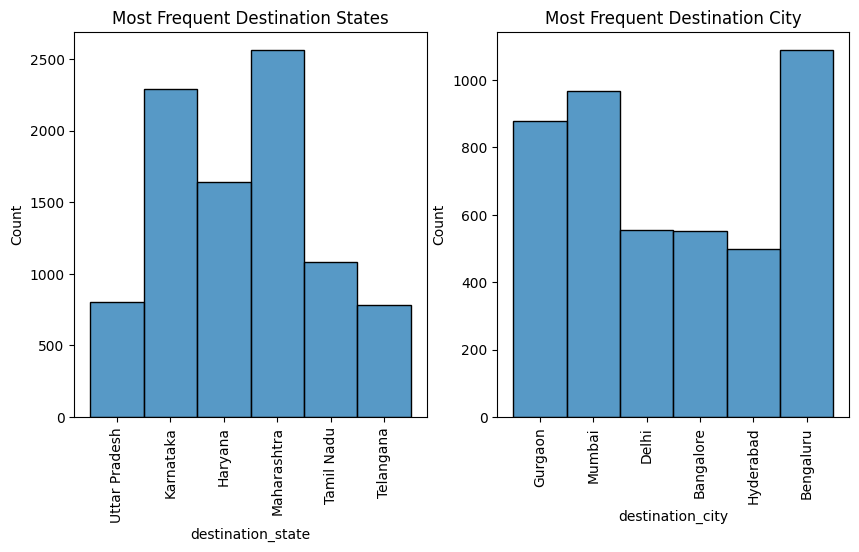

In [ ]:
plt.figure(figsize=(10,5))


plt.subplot(1, 2, 1)

top_freq = trip['destination_state'].value_counts().nlargest(6)

# filter the original data to keep only the values with top frequencies
data_top6 = trip[trip['destination_state'].isin(top_freq.index)]
sns.histplot(data_top6['destination_state'])
plt.title('Most Frequent Destination States')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
top_freq = trip['destination_city'].value_counts().nlargest(6)

# filter the original data to keep only the values with top frequencies
data_top6 = trip[trip['destination_city'].isin(top_freq.index)]
sns.histplot(data_top6['destination_city'])
plt.title('Most Frequent Destination City')
plt.xticks(rotation=90)

- Maximum orders are in the states of `Maharashtra`, `Karnataka`, `Haryana`
- Among cities, maximum orders are from `Bangalore`, `Gurgaon`, `Mumbai`

## Feature Engineering : Extracting year, month, day from trip_creation_time

In [ ]:
trip['trip_creation_day'] = trip['trip_creation_time'].dt.day
trip['trip_creation_day_of_week'] = trip['trip_creation_time'].dt.weekday
trip['trip_creation_month'] = trip['trip_creation_time'].dt.month
trip['trip_creation_year'] = trip['trip_creation_time'].dt.year
trip['trip_creation_day_category'] = pd.cut(trip['trip_creation_day'], bins=[0,7,14,21,28, 31], labels=['0-7', '8-14', '15-21', '22-28', '29-31'])

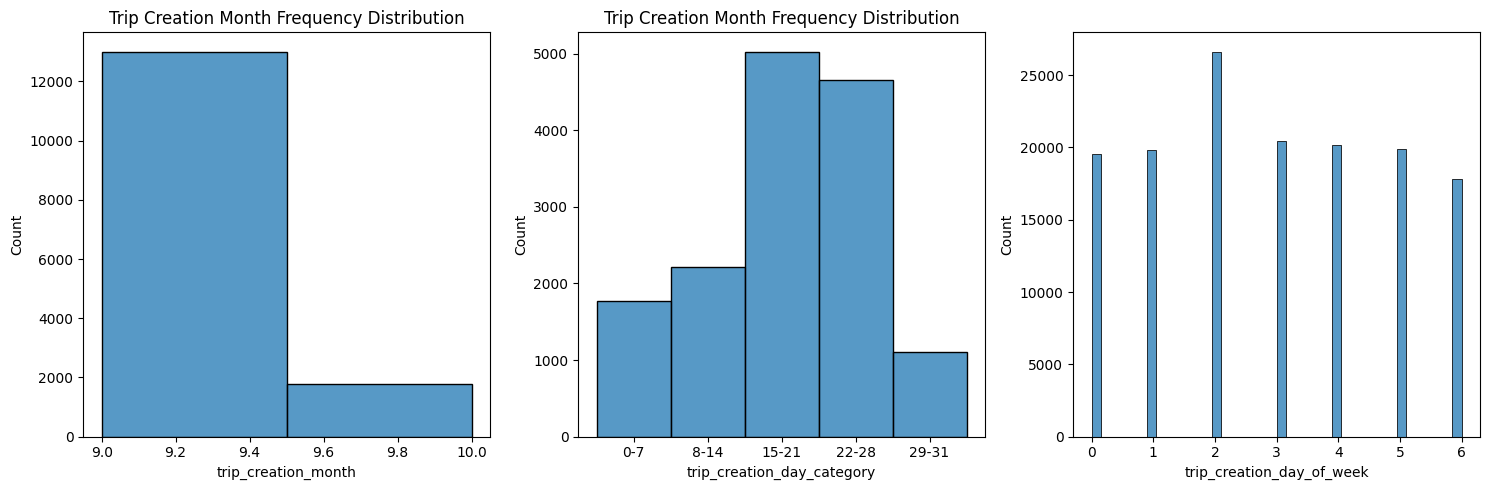

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.histplot(trip['trip_creation_month'], bins=2)
plt.title("Trip Creation Month Frequency Distribution")

plt.subplot(1, 3, 2)
sns.histplot(trip['trip_creation_day_category'])
plt.title("Trip Creation Month Frequency Distribution")

plt.subplot(1, 3, 3)
sns.histplot(df['trip_creation_day_of_week'])

plt.tight_layout()

- From the dataset, the orders are for the monts of `September` and `October`
- There are few orders towards the end of the month
- Maximum orders are in the 3rd and 4th week of the month
- Most of the orders take place on `Wednesday`.
- The trend reduces towards the weekend.

### Business Insights

- There is a significant difference between the actual_time and open_source_routing engine results. Data fed into the routing engine should be checked thoroughly. Bridging the gap between estimated_time and actual_time can help in efficient operations and improved customer satisfactions
- Since Karnataka and Maharashtra are having the highest traffic, operations could be expanded here to absorb more customers.
- Among the cities, Bangalore, Mumbai and Gurgaon have the highest traffic.